### Logistic regression

###### 6/29/2021 John Park 
Logistic regression is a fantastic place to start for classification problems. It is also great to build up on our discussion about ordinary least square regression method. More importantly, it has shockingly close connection with deep neural networks (sigmoid function, recursive generalized linear model, backward propagation, updating weights). It is essential to understand logistic regression to further advance in machine learning. 

Logistic regression is one of the simpliest probablistic classifiers. It has bunch of advantages, and most important one is that the outcome does not get affected by collinearity of the indepdent variables, thus robust to correlated features, and therefore is suitable for large scale data analysis (Jurafsky, 2020). Whereas naive bayes is more suitable for smaller data set and is sensitive to collinearity of the features. However it is easy to implement and train the data. 

In this notebook, we will cover various topics arising from derivation and implementation of logistic regression. The topics include weighted linear regression, probability distribution, conditional probability, cross entropy loss, gradient decsent, probablistic classifier.   

I adapted codes from https://beckernick.github.io/logistic-regression-from-scratch/

References: 

Elements of statistical learning 

Speech and language Processing, Daniel Jurafsky, James W. Martin. 2020.

##### Conditional probability 

$$\hat y $$

$$ z=W^{T}X+b $$

$$ P(y=1 | X)= \sigma (W^{T}X+b)=1/[1+exp(-(W^{T}X+b)] $$

$$ P(y=0 | X)= 1-\sigma(z) =\sigma (-z)=1/[1+exp(W^{T}X+b)]$$

##### Maximum likelihood estimation of bernoulli distribution 
$$ L (\hat y,y) = y log\hat y +(1-y) log(1-\hat y) $$
###### Cross entropy Loss LCE derivation
$$-log(p(y| x)= -[ylog \hat y +(1-y)log(1-\hat y)]$$

###### Partial derivative of LCE $$ \frac{\partial L_{CE}}{\partial w_{j}}= [\sigma (w\dot x +b)-y]x_{j} $$

###### Equation for updating weight 

$$ W(n+1) = W(n) - \eta [ \sigma(W(n)^Tx+b-y)]X $$

###### How is gradient calculated? chain rule

In [8]:
import numpy as np
import pandas as pd
import math
import os
import sys
os.getcwd()

'C:\\Users\\vmlea\\Documents\\Work\\Essential-Math-for-ML\\Chap1-Linear-Regression'

In [44]:
df=pd.read_csv('../data/examPF.csv')
x=np.array(df[df.columns[0]])
y=np.array(df[df.columns[1]])
Nstep=1000
weights,loglike = logistic_regression(x, y,
                    num_steps = Nstep, learning_rate = 0.01, add_intercept=True)
#np.column_stack((np.ones(12),x))
#np.dot(np.column_stack((np.ones(12),x)),
#       np.array([0,0]).reshape((2,1)))

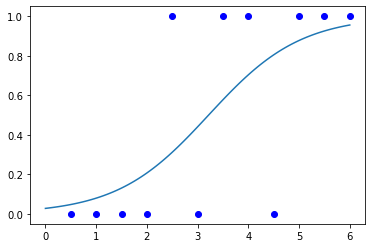

In [45]:
import matplotlib.pyplot as plt
t=np.linspace(0, 6, 100)
wt=sigm(weights[Nstep-1][0]+weights[Nstep-1][1]*t)

plt.plot(x,y,'bo')
plt.plot(t,wt)


In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 100

class1 = np.random.multivariate_normal([5, 8], [[1, .75],[.75, 1]], num_observations)
class2 = np.random.multivariate_normal([7, 12], [[1, .75],[.75, 1]], num_observations)

sim_features = np.vstack((class1, class2)).astype(np.float32)
sim_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

#np.column_stack((np.ones((200,1)),sim_features))
#vstack does not stack (x,2) and (x,1) matrices together

In [47]:
def sigm(x):
    return 1 / (1 + np.exp(-x))
#assert sigm(0) == 0.5 #what is assert?

def log_likelihood(data, obs, weights):
    AX_b = np.dot(data, weights)
    ll = np.sum( obs*AX_b - np.log(1 + np.exp(AX_b)) )
    return ll

def logistic_regression(features, obs, num_steps, learning_rate, add_intercept = False):
    if len(features.shape)==1:
        features=features.reshape((features.shape[0],1))
    if len(obs.shape)==1:
        obs=obs.reshape((obs.shape[0],1))
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.column_stack((intercept, features))  
        
    weights = np.zeros(features.shape[1]).reshape(features.shape[1],1)
    weights_all=[]
    loglike_all=[]
    
    for step in range(num_steps):
        AX_b = np.dot(features, weights)
        predictions = sigm(AX_b)
        # Gradient descent
        error = obs - predictions
        gradient = np.dot(features.T, error)
        weights_all.append(weights)
        weights = weights+learning_rate * gradient
        loglike=log_likelihood_mul(features, obs, weights)
        # Print log-likelihood every so often
        #if step % 10 == 0:
        #    print(loglike)    
        loglike_all.append(loglike)
    return [weights_all, loglike_all]

weights, loglike= logistic_regression(sim_features, sim_labels,
                     num_steps = 2000, learning_rate = 0.0005, add_intercept=True)



(5.0, 15.0)

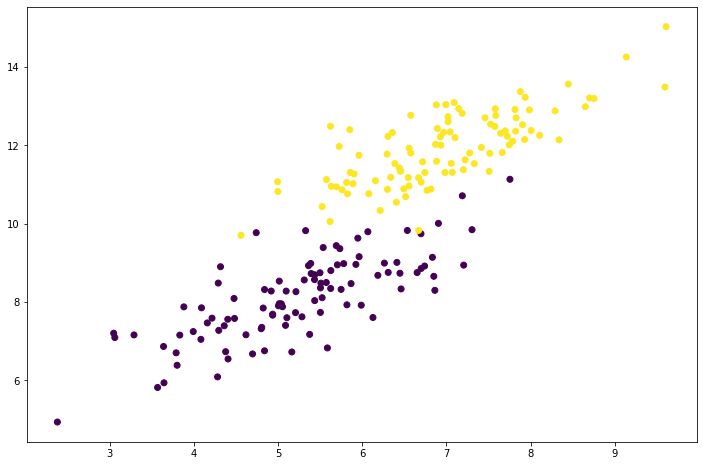

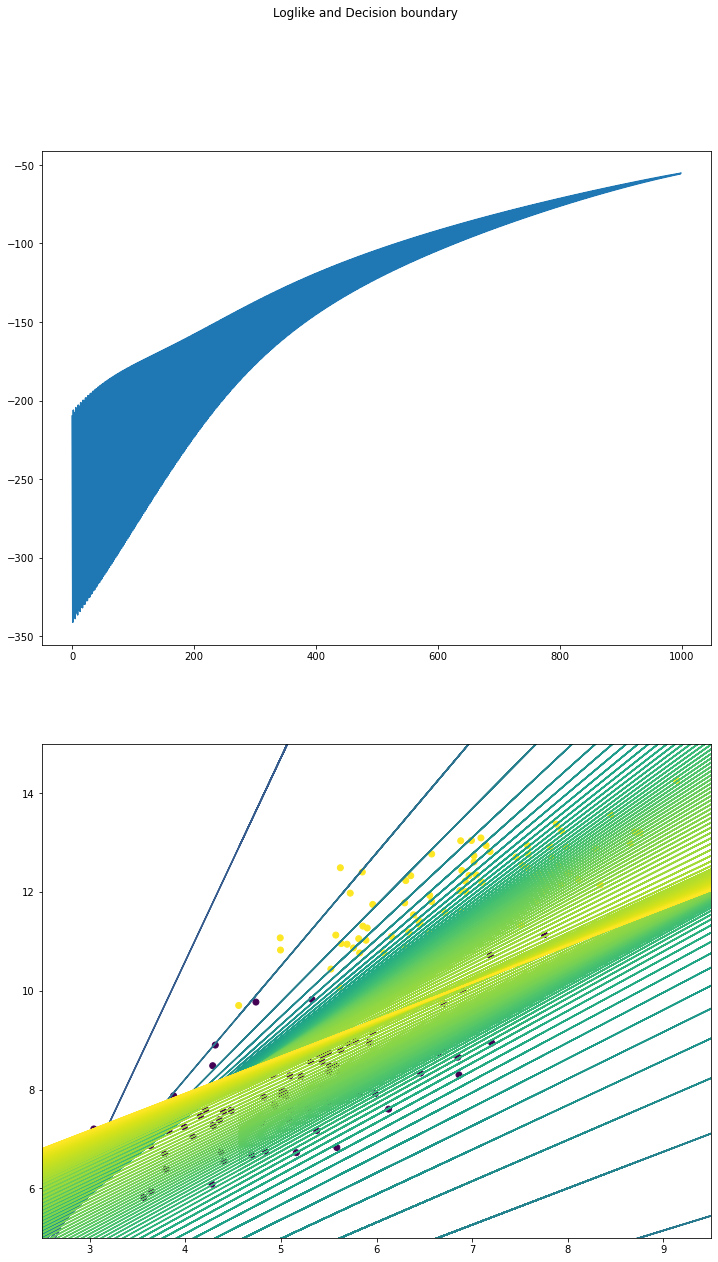

In [43]:
def Dbdry2D(x1,weights):
    Dbdry=(np.log(0.5)-weights[0]-weights[1]*x1)/weights[2]
    return Dbdry
x1=sim_features[:, 0]
x2=sim_features[:, 1]
Niter=len(weights)-1

plt.figure(figsize=(12,8))
plt.scatter(sim_features[:, 0], sim_features[:, 1],
            c = sim_labels)

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(12,20))
fig.suptitle('Loglike and Decision boundary')
ax1.plot(loglike[1:1000])
LineNum=150
import math 
K=math.trunc(Niter/LineNum)
for i in range(1,LineNum):
    
    line=Dbdry2D(x1,weights[K*i])
    nth=K*i
    ax2.plot(x1,line,label=nth)
    
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.sqrt(np.sqrt(np.linspace(0, 1,len(ax2.lines))))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
    
ax2.scatter(x1,x2 , c = sim_labels)
ax2.set_xlim([2.5, 9.5])
ax2.set_ylim([5, 15])

#ax2.legend(loc=2)
# How to add lengend expressing the number of iteration?


#### Questions and follow ups.

###### How can we get the learning rate which gaurantee minimum iteration to arrive in global minima?
###### What are the ways that you could do this in automated fashion? 
In this notebook, I did a grid search. eta=0.01 (can't calculate) -> 0.001 (converge, but jumps drastically in the beginning,more gradual later, still jumps, when close to global minima converges nicely)-> 0.005(converge faster than 0.001, more jumps)->0.0001 (converge smoothly from the beginning to the end, too slow)-> 0.0005 (converge fast, jumps while gradient desecent, but goes down the gradient smoothly later until reaching the global minima)
###### Maxent is logistic regression. Ecological niche modeling, species distribution modeling
###### How do you plot decision boundary to show the convergence of the loss - continuous fitting? Movie? or spectrum of lines?
###### Why vector and matrix are different to implement in funtion? I want to make the functions more simple. 
###### from 4.4.1. pp 120 in Elements of statistical learning, why is log likelihood np.sum( target*scores - np.log(1 + np.exp(scores)) )?
###### What is the difference using gradient descent (features*output_error_signal) vs newton's method?

Newton's method utilizes the second derivative in order to penalize gradient where gradient change is not so sensitive to its direction in the parameter space. As the result, we will pick the direction of steepest gradient with minimal change in the direction, which is same as finding geodesic path with steepest gradient.   

###### How can we optimize if cost function is not convex (e.g., squared loss for logistic regression)?
    
We can use stochastic gradient descent with mini batch size, which could allow us an approximate- cost funciton with convex-like proporties. Also, we can use Newton's methods instead of gradient descent. Or momentum-based learning.  Coordinate descent.

###### About the cost function
https://stats.stackexchange.com/questions/268430/loss-function-for-logistic-regression

https://pabloinsente.github.io/the-adaline

https://towardsdatascience.com/animations-of-logistic-regression-with-python-31f8c9cb420

https://www.youtube.com/watch?v=0VMK18nphpg

https://stats.stackexchange.com/questions/268430/loss-function-for-logistic-regression


https://stats.stackexchange.com/questions/267400/logistic-regression-cost-surface-not-convex

https://stats.stackexchange.com/questions/326350/what-is-happening-here-when-i-use-squared-loss-in-logistic-regression-setting

In [48]:
# Regression curve
def pred_curve(xs,w0,b0):  # predict y-values for regression curve
    z=xs.T@w0.T  + b0   
    p=expit(z)  
    return p

# Create data for surface plot: 
def CrossEntropy_cost(x,y,w0,b0):  # returns costs for every pair of w and b. 
        p=expit(x @ w0.T + b0)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p))

ws = np.linspace(-0.005, 0.075, 40) # set range of values for w ... 
bs = np.linspace(-1.75, 0.75, 40)  # ... and b for surface plot
M, B = np.meshgrid(ws, bs) # create meshgrid for surface plot
zs = np.array([CrossEntropy_cost(x_train,y_train,       # determine costs for each pair of w and b 
                       np.array([[wp]]), np.array([[bp]]))  # CrossEntropy_cost() only accepts wp and bp as matrices. 
               for wp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape) # get z-values for surface plot in shape of M.

# Define which epochs to plot: 
a1=np.arange(0,20,1).tolist() 
a2=np.arange(20,100,20).tolist()
a3=np.arange(100,500,200).tolist()
a4=np.arange(500,40000,4000).tolist()
a5=np.arange(40000,600000,20000).tolist()
points_ = a1+a2+a3+a4+a5

# Create first animation (regression curve & surface plot):
fig = plt.figure(figsize=(10,10)) # create figure
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1.7]) # set height ratios of subplots

label_font_size = 28 # size of label fonts
tick_label_size= 18 # size of tick labels

# Customize subplots: 
ax0=fig.add_subplot(gs[0]) # add first subplot to figure
ax0.set_title("Logistic regression curve", fontsize=22) #set title
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size) # set tick label size
ax0.set_xlabel("x", fontsize=label_font_size, labelpad=5) # set axis labels
ax0.set_ylabel("y", fontsize=label_font_size, labelpad=5)
ax0.tick_params(axis='both', which='major',
                labelsize=tick_label_size) 
ax0.set_ylim([-0.05, 1.2]) # set range for y-values in the plot
ax0.set_yticks([0,0.2,0.4,0.6,0.8, 1]) # set y-axis ticks
ax0.set_yticklabels(["0","0.2","0.4","0.6","0.8", "1.0"], # label y-ticks
                    fontsize=tick_label_size)
ax1=fig.add_subplot(gs[1], projection="3d") # add second subplot 
ax1.view_init(elev=25, azim=-70) # set view
ax1.set_xlabel("w", fontsize=label_font_size, labelpad=16) 
ax1.set_ylabel("b", fontsize=label_font_size, labelpad=18)
ax1.set_zlabel("costs", fontsize=label_font_size, labelpad=13)  
ax1.tick_params(axis='both', which='major', labelsize=tick_label_size) 
ax1.set_xticks([0, 0.02,0.04,0.06]) 
ax1.set_xticklabels(["0", "0.02","0.04","0.06"], fontsize=tick_label_size)
ax1.set_yticks([-1.5,-1, -0.5,0,0.5]) 
ax1.set_yticklabels(["-1.5","-1", "-0.5","0","0.5"], fontsize=tick_label_size)
ax1.set_zticks([0.4,0.6, 0.8,1.0]) 
ax1.set_zticklabels(["0.4","0.6", "0.8","1.0"], fontsize=tick_label_size)
ax1.tick_params(axis='z', pad=7, which='major', labelsize=tick_label_size) 
plt.tight_layout() # adjusts subplots to figure area

camera = Camera(fig)  # create camera 
for i in points_:
    
    # Plot logistic regression curve: 
    ys = pred_curve(xs,np.array([w.flatten()[i]]),b.flatten()[i]) #calculate y-values for reg. curve
    leg=ax0.plot(xs.flatten(),ys.flatten(),
                 color='r', label=str(i))
    
    # Scatter plot of training data:
    ax0.scatter(x_train, y_train, color='b',marker='x', s=92) # plot training data points
    ax0.legend(leg,[f'costs: {np.round(c.flatten()[i],3)}'], # customize legend
               loc='upper left', fontsize=18)
    
    # Plot connecting lines (between predicted y-values and training data points):
    cl_=cl[i]
    for j in range(len(y_train)):    
        x,y = [x_train[j],x_train[j]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y, color='black',s=0.5)
        ax0.plot(x,y, color='black', linewidth=1.5, 
                 linestyle='dashed', alpha=0.4)
        
    # Surface plot of costs:
    ax1.plot_surface(M, B, Z, rstride=1, cstride=1, 
                     alpha=0.80,cmap=cm.coolwarm) 
    
    # Plot trajectory of gradient descent:
    ax1.plot(w.flatten()[0:i],b.flatten()[0:i], 
             c.flatten()[0:i], linestyle="dashed",
             linewidth=2.5, color="black")
    ax1.scatter(w.flatten()[i],b.flatten()[i],   
                c.flatten()[i], marker="o",s=70*2, color="black")
    
    # Customize legend: 
    ax1.legend(leg,[f'epochs: {i}'], 
               loc='upper left', fontsize=18)
    
    camera.snap() # take snapshot after each frame/iteration
    
# Create animation: 
animation = camera.animate(interval = 100, # set delay between frames in milliseconds.
                          repeat = False, repeat_delay = 0) 
# Save animation: 
animation.save('LogReg_1.gif', writer = 'imagemagick') 

#print("Final weights: "+ str(w.flatten()[i]))    # 0.03579113198262307
#print("Final bias: "+ str(b[i]))                 # [-1.11258967]
#print("Final costs: " + str(c[i]))               # [0.40058369]

NameError: name 'x_train' is not defined

In [3]:
np.log(0.5)-weights[0]-weights[1]*x1)/weights[2]

array([13, 65])

In [92]:
8.6/19

0.4526315789473684

In [2]:
import numpy as np
x = np.arange(1, 10).reshape((3, 3))

x

In [6]:
np.array([0,0]).reshape((2,1))

array([[0],
       [0]])